# Introduction

This lab demonstrates how to precompute the k nearest neighbors before using them in KNeighborsClassifier. KNeighborsClassifier can compute the nearest neighbors internally, but precomputing them can have several benefits, such as finer parameter control, caching for multiple use, or custom implementations. Here we use the caching property of pipelines to cache the nearest neighbors graph between multiple fits of KNeighborsClassifier.

# Import Libraries

In this step, we will import all the necessary libraries.


In [1]:
from tempfile import TemporaryDirectory
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier, KNeighborsTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_digits
from sklearn.pipeline import Pipeline

# Load Data

In this step, we will load the digits dataset from scikit-learn.

In [2]:
X, y = load_digits(return_X_y=True)
n_neighbors_list = [1, 2, 3, 4, 5, 6, 7, 8, 9]

# Compute Nearest Neighbors Graph

In this step, we will compute the nearest neighbors graph using KNeighborsTransformer.

In [3]:
# The transformer computes the nearest neighbors graph using the maximum number
# of neighbors necessary in the grid search. The classifier model filters the
# nearest neighbors graph as required by its own n_neighbors parameter.

graph_model = KNeighborsTransformer(n_neighbors=max(n_neighbors_list), mode="distance")

# Define Classifier Model

In this step, we will define the KNeighborsClassifier model.

In [4]:
classifier_model = KNeighborsClassifier(metric="precomputed")

# Cache Nearest Neighbors Graph

In this step, we will cache the nearest neighbors graph between multiple fits of KNeighborsClassifier using the caching property of pipelines.

In [5]:
# Note that we give `memory` a directory to cache the graph computation
# that will be used several times when tuning the hyperparameters of the
# classifier.
with TemporaryDirectory(prefix="sklearn_graph_cache_") as tmpdir:
    full_model = Pipeline(
        steps=[
            ("graph", graph_model),
            ("classifier", classifier_model)],
        memory=tmpdir
    )

# Tune Hyperparameters

In this step, we will tune the hyperparameters of the classifier using GridSearchCV

In [6]:
    param_grid = {"classifier__n_neighbors": n_neighbors_list}
    grid_model = GridSearchCV(full_model, param_grid)
    grid_model.fit(X, y)

GridSearchCV(estimator=Pipeline(memory='/var/folders/xl/cw1gsh4s5398kfn_9w27_tmc0000gn/T/sklearn_graph_cache_uezi9a_j',
                                steps=[('graph',
                                        KNeighborsTransformer(n_neighbors=9)),
                                       ('classifier',
                                        KNeighborsClassifier(metric='precomputed'))]),
             param_grid={'classifier__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                     9]})

# Visualize Results

In this step, we will visualize the results of the grid search.

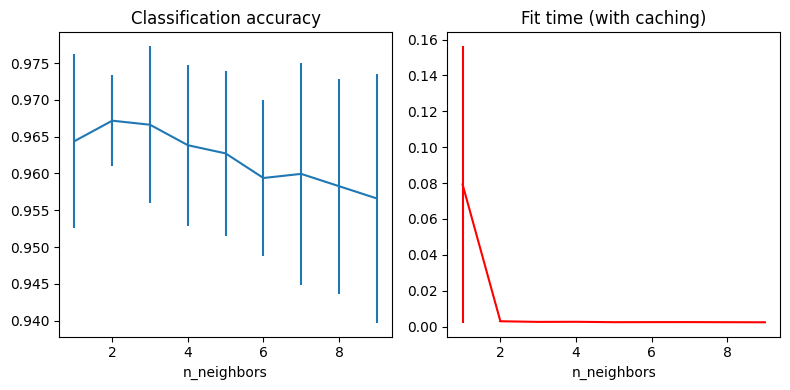

In [7]:
# Plot the results of the grid search.
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].errorbar(
    x=n_neighbors_list,
    y=grid_model.cv_results_["mean_test_score"],
    yerr=grid_model.cv_results_["std_test_score"],
)
axes[0].set(xlabel="n_neighbors", title="Classification accuracy")
axes[1].errorbar(
    x=n_neighbors_list,
    y=grid_model.cv_results_["mean_fit_time"],
    yerr=grid_model.cv_results_["std_fit_time"],
    color="r",
)
axes[1].set(xlabel="n_neighbors", title="Fit time (with caching)")
fig.tight_layout()
plt.show()

# Summary

In this lab, we have learned how to precompute the k nearest neighbors before using them in KNeighborsClassifier using the caching property of pipelines. We have also learned how to tune the hyperparameters of the classifier using GridSearchCV and visualize the results.